In [1]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("NY-House-Dataset.csv")
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,315000,2,2.000000,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
1,Brokered by Serhant,Condo for sale,195000000,7,10.000000,17545.0,Central Park Tower Penthouse-217 W 57th New Yo...,"New York, NY 10019",Central Park Tower Penthouse-217 W 57th New Yo...,United States,New York,New York County,New York,West 57th Street,"217 W 57th St, New York, NY 10019, USA",40.766393,-73.980991
2,Brokered by Sowae Corp,House for sale,260000,4,2.000000,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
3,Brokered by COMPASS,Condo for sale,69000,3,1.000000,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
4,Brokered by Sotheby's International Realty - E...,Townhouse for sale,55000000,7,2.373861,14175.0,5 E 64th St,"New York, NY 10065","5 E 64th StNew York, NY 10065",United States,New York,New York County,New York,East 64th Street,"5 E 64th St, New York, NY 10065, USA",40.767224,-73.969856


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

In [4]:
df.nunique()

BROKERTITLE                    1036
TYPE                             13
PRICE                          1274
BEDS                             27
BATH                             22
PROPERTYSQFT                   1445
ADDRESS                        4582
STATE                           308
MAIN_ADDRESS                   4583
ADMINISTRATIVE_AREA_LEVEL_2      29
LOCALITY                         11
SUBLOCALITY                      21
STREET_NAME                     174
LONG_NAME                      2731
FORMATTED_ADDRESS              4550
LATITUDE                       4196
LONGITUDE                      4118
dtype: int64

In [5]:
df.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.801000e+03,4801.000000,4801.000000,4801.000000,4801.000000,4801.000000
mean,2.356940e+06,3.356801,2.373861,2184.207862,40.714227,-73.941601
std,3.135525e+07,2.602315,1.946962,2377.140894,0.087676,0.101082
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.990000e+05,2.000000,1.000000,1200.000000,40.639375,-73.987143
50%,8.250000e+05,3.000000,2.000000,2184.207862,40.726749,-73.949189
75%,1.495000e+06,4.000000,3.000000,2184.207862,40.771923,-73.870638
max,2.147484e+09,50.000000,50.000000,65535.000000,40.912729,-73.702450


<Axes: xlabel='PRICE', ylabel='Count'>

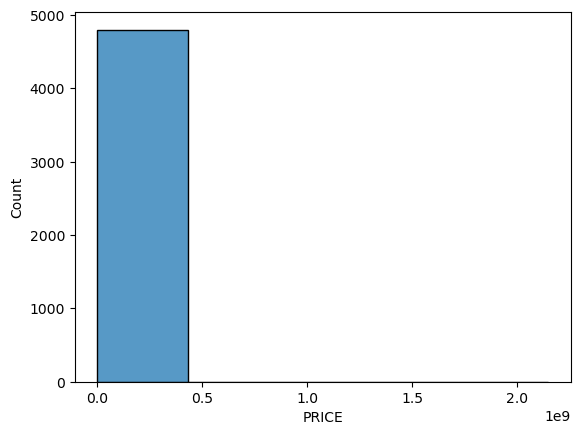

In [6]:
sns.histplot(data=df,x='PRICE',bins=5)

<Axes: xlabel='PRICE'>

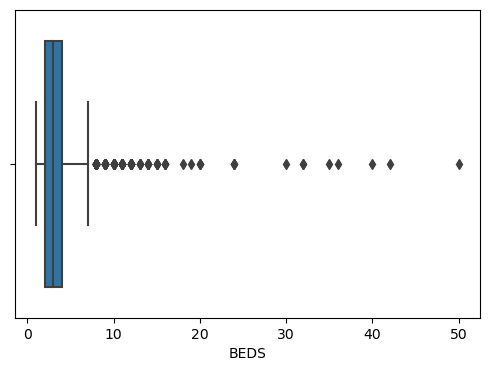

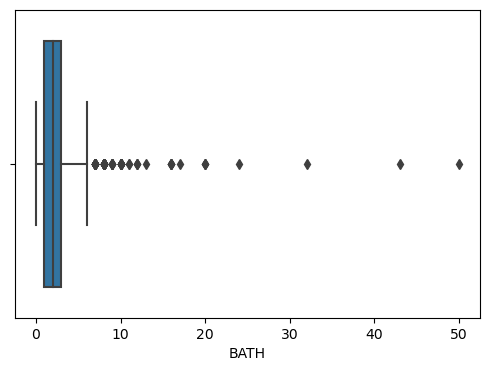

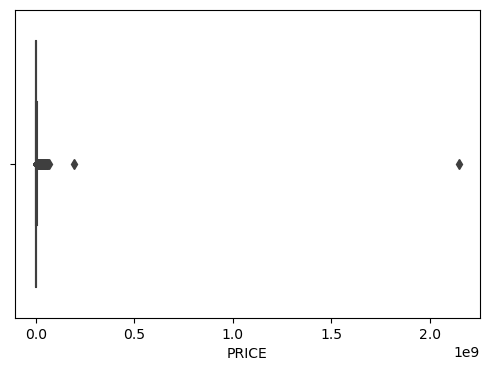

In [7]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='BEDS')
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='BATH')
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='PRICE')

In [8]:
Q1=df['PRICE'].quantile(0.25)
Q3=df['PRICE'].quantile(0.75)
IQR=Q3-Q1
lowoutlier=Q1-1.5*IQR
highoutlier=Q3+1.5*IQR
totaloutlier=((df['PRICE']<lowoutlier)|(df['PRICE']>highoutlier)).sum()
print('Total outliers: ',totaloutlier)

Total outliers:  559


In [9]:
df_new=df[(df['PRICE']<highoutlier)&(df['PRICE']>lowoutlier)]
totaloutlier = ((df_new['PRICE']<lowoutlier)|(df_new['PRICE']>highoutlier)).sum()
print("Total Number of Outliers in the price are {}".format(totaloutlier))

Total Number of Outliers in the price are 0


In [10]:
df_new.describe()

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
count,4.242000e+03,4242.000000,4242.000000,4242.000000,4242.000000,4242.000000
mean,8.984895e+05,3.126827,2.097123,1848.546915,40.710494,-73.937130
std,6.092312e+05,2.086537,1.306940,1018.885864,0.090711,0.105707
min,2.494000e+03,1.000000,0.000000,230.000000,40.499546,-74.253033
25%,4.499992e+05,2.000000,1.000000,1100.500000,40.632793,-73.984830
50%,7.490000e+05,3.000000,2.000000,2151.000000,40.721391,-73.940040
75%,1.195000e+06,4.000000,2.373861,2184.207862,40.770987,-73.859971
max,2.980000e+06,24.000000,24.000000,21000.000000,40.912729,-73.702450


<Axes: xlabel='PRICE', ylabel='Count'>

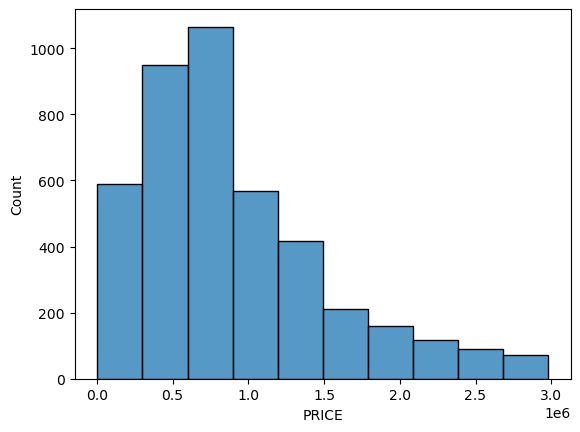

In [11]:
sns.histplot(data=df_new,x='PRICE',bins=10)


<Axes: xlabel='PROPERTYSQFT', ylabel='PRICE'>

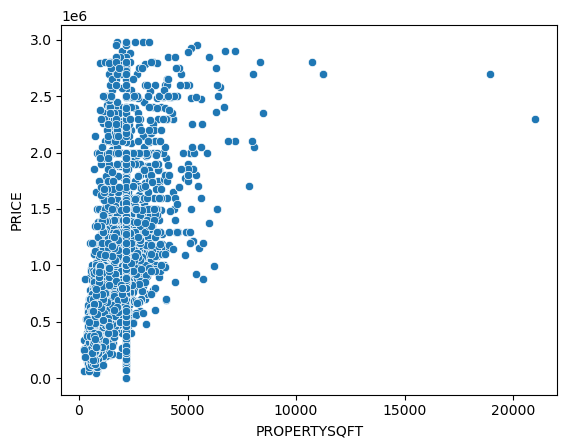

In [12]:
sns.scatterplot(data=df_new,x='PROPERTYSQFT',y='PRICE')

<Axes: xlabel='BATH', ylabel='PRICE'>

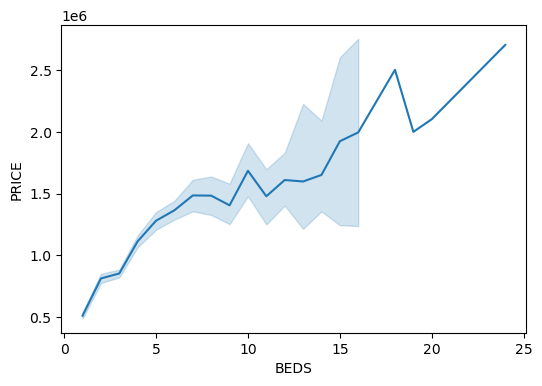

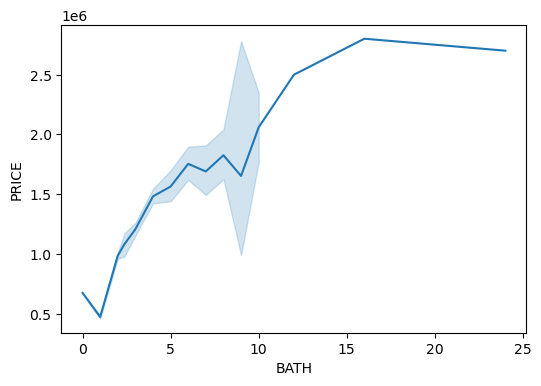

In [13]:
plt.figure(figsize=(6,4))
sns.lineplot(data=df_new,x='BEDS',y='PRICE')
plt.figure(figsize=(6,4))
sns.lineplot(data=df_new,x='BATH',y='PRICE')

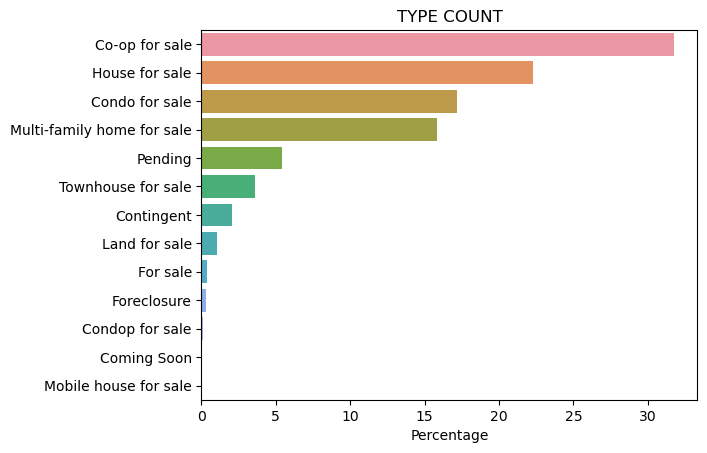

In [14]:
def plot_percentage(df_new, col):
    count_col = df_new[col].value_counts() * 100 / df_new[col].count()
    sns.barplot(x=count_col, y=count_col.index)
    plt.title(f"{col} COUNT")
    plt.ylabel(None)
    plt.xlabel("Percentage")
    plt.show(block=True)
plot_percentage(df_new, "TYPE")

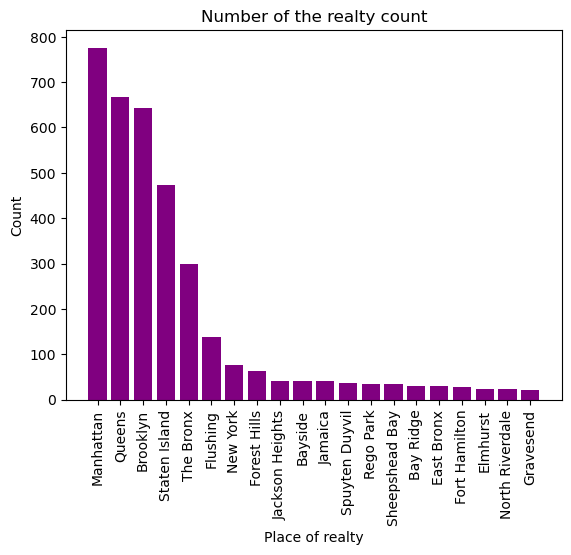

In [15]:
counter=df_new['STREET_NAME'].value_counts()
plt.bar(counter.index[:20],counter[:20],color='purple')
plt.xticks(rotation=90)
plt.xlabel('Place of realty')
plt.ylabel('Count')
plt.title('Number of the realty count')
plt.show()

In [16]:
df_region_info = df_new.groupby("LOCALITY").agg({
    "PRICE": 'median',
    "BEDS": 'median',
    "BATH": 'median',
    "PROPERTYSQFT": 'median'
})
df_region_info = df_region_info.sort_values("PRICE", ascending=False).reset_index()
df_region_info

,LOCALITY,PRICE,BEDS,BATH,PROPERTYSQFT
0,New York,899000.0,4.0,2.000000,2184.207862
1,New York County,849750.0,2.0,1.000000,2184.207862
2,United States,849000.0,3.0,2.373861,2184.207862
3,Flatbush,650000.0,3.0,1.000000,1050.000000
4,Brooklyn,599000.0,1.0,1.000000,730.000000
5,Kings County,539000.0,2.0,1.000000,1000.000000
6,Queens,453000.0,2.0,1.000000,1692.103931
7,Queens County,375000.0,2.0,1.000000,2184.207862
8,Richmond County,350000.0,2.0,1.000000,900.000000
9,The Bronx,295000.0,2.0,1.000000,1450.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'New York'),
  Text(1, 0, 'New York County'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'Flatbush'),
  Text(4, 0, 'Brooklyn'),
  Text(5, 0, 'Kings County'),
  Text(6, 0, 'Queens'),
  Text(7, 0, 'Queens County'),
  Text(8, 0, 'Richmond County'),
  Text(9, 0, 'The Bronx'),
  Text(10, 0, 'Bronx County')])

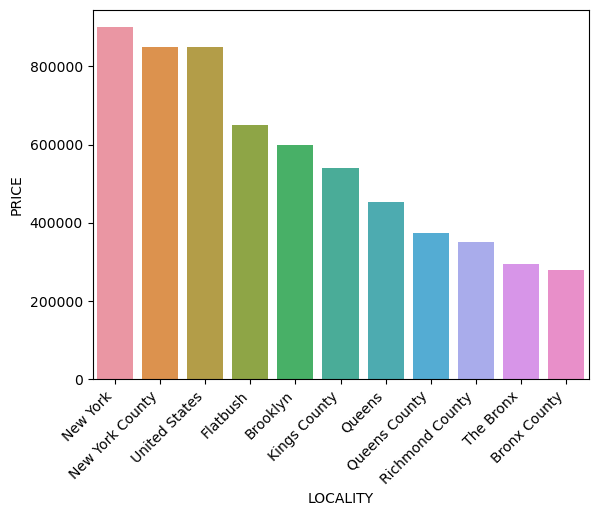

In [17]:
sns.barplot(x="LOCALITY", y="PRICE", data=df_region_info)
plt.xticks(rotation=45, ha='right')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'New York'),
  Text(1, 0, 'New York County'),
  Text(2, 0, 'United States'),
  Text(3, 0, 'Queens County'),
  Text(4, 0, 'Queens'),
  Text(5, 0, 'The Bronx'),
  Text(6, 0, 'Flatbush'),
  Text(7, 0, 'Kings County'),
  Text(8, 0, 'Bronx County'),
  Text(9, 0, 'Richmond County'),
  Text(10, 0, 'Brooklyn')])

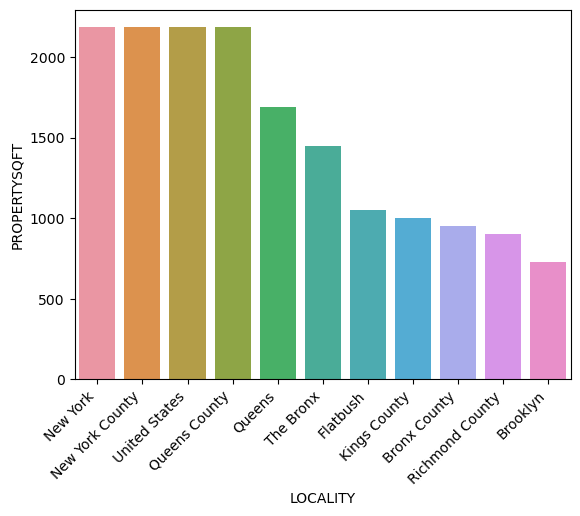

In [18]:
sns.barplot(x="LOCALITY", y="PROPERTYSQFT", data=df_region_info.sort_values("PROPERTYSQFT", ascending=False))
plt.xticks(rotation=45, ha='right')